In [1]:
import sqlalchemy as db
import numpy as np
import pandas as pd
import pyodbc
import yaml
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import umap
import umap.plot

# custom functions imports
import MS_Functions as f
import read_famos as dat

C:\Users\Marija\anaconda3\envs\process-optimization\lib\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
db_config_file_path = '../db_config.yml'
db_config = yaml.safe_load(open(db_config_file_path))

In [3]:
engine = db.create_engine('{DB_DRIVER}://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}?driver={DB_ODBC_DRIVER}'.format(**db_config))

In [4]:
sql = """
SELECT 
*,
CASE WHEN NIO=0 THEN 0 ELSE 1 END NIO_GROUP
FROM dbo.prozessmessung_schleifen ps 
WHERE WARM = 0
AND TEACH_ACTIVE = 0
AND READY = 1
AND MA_NR = 78635
AND WSG_ID IN (14, 15)
AND WZD_ID IN (10027, 22, 10026)
AND ST_ID IN (20371, 20365, 20366)
AND AT_ID IN (10082, 80);
"""

In [5]:
with engine.connect() as conn:
    df = pd.read_sql(sql=sql, con=conn)

In [7]:
df.shape

(113035, 112)

In [6]:
spectral_data = [
    'SPEK_L1',
    'SPEK_L2',
    'SPEK_L3',
    'SPEK_LP',
    'SPEK_R1_1',
    'SPEK_R2_1',
    'SPEK_R3_1',
    'SPEK_RP_1',
    'SPEK_R1_2',
    'SPEK_R2_2',
    'SPEK_R3_2',
    'SPEK_RP_2',
    'SPEK_R1_3',
    'SPEK_R2_3',
    'SPEK_R3_3',
    'SPEK_RP_3',
    'SPEK_R1_4',
    'SPEK_R2_4',
    'SPEK_R3_4',
    'SPEK_RP_4',
    'SPEK_R1_5',
    'SPEK_R2_5',
    'SPEK_R3_5',
    'SPEK_RP_5',
    'SPEK_R1_6',
    'SPEK_R2_6',
    'SPEK_R3_6',
    'SPEK_RP_6',
    'FFT_RED_SPEK_L1',
    'FFT_RED_SPEK_L2',
    'FFT_RED_SPEK_L3',
    'FFT_RED_SPEK_LP',
    'FFT_RED_SPEK_R1',
    'FFT_RED_SPEK_R2',
    'FFT_RED_SPEK_R3',
    'FFT_RED_SPEK_RP',
    'FFT_RED_FREQ_SPEK_RP',
    'FFT_RED_FREQ_SPEK_R1',
    'FFT_RED_FREQ_SPEK_R2',
    'FFT_RED_FREQ_SPEK_R3',
    'FFT_RED_FREQ_SPEK_L1',
    'FFT_RED_FREQ_SPEK_L2',
    'FFT_RED_FREQ_SPEK_L3',
    'FFT_RED_FREQ_SPEK_LP'
]

In [485]:
a_dict = df['FFT_RED_SPEK_LP'].head().apply(lambda x: dat.load_channels(x) if x is not None else None)

In [486]:
a_dict

0    {'FFT_RED_SPEK_LP': {'delta_x': 1.0, 'trigger_...
1    {'FFT_RED_SPEK_LP': {'delta_x': 1.0, 'trigger_...
2                                                 None
3                                                 None
4    {'FFT_RED_SPEK_LP': {'delta_x': 1.0, 'trigger_...
Name: FFT_RED_SPEK_LP, dtype: object

In [588]:
a_dict[0]

{'FFT_RED_SPEK_LP': {'delta_x': 1.0,
  'trigger_time': '2020-12-01 22:34:12.6485',
  'decode_value_y': '7',
  'BytePerValue_value_y': '4',
  'buffer_size_value_y': 24,
  'buffer_start_value_y': 0,
  'X0': 0.0,
  'unit_y': '',
  'unit_y_scale-factor': 0.0,
  'unit_y_scale-factor_Offset': 0.0,
  'name': 'FFT_RED_SPEK_LP',
  'value_y': array([0.16316135, 0.19757606, 0.82893825, 0.27427515, 0.44376013,
         0.32839555], dtype=float32)}}

In [591]:
dat.load_channels(df['FFT_RED_FREQ_SPEK_LP'][0])

{'FFT_RED_FREQ_SPEK_LP': {'delta_x': 1.0,
  'trigger_time': '2020-12-01 22:34:12.6485',
  'decode_value_y': '7',
  'BytePerValue_value_y': '4',
  'buffer_size_value_y': 24,
  'buffer_start_value_y': 0,
  'X0': 0.0,
  'unit_y': 'Hz',
  'unit_y_scale-factor': 0.0,
  'unit_y_scale-factor_Offset': 0.0,
  'name': 'FFT_RED_FREQ_SPEK_LP',
  'value_y': array([ 10.7421875,  15.625    ,  82.03125  ,  88.86719  , 151.36719  ,
         163.08594  ], dtype=float32)}}

In [590]:
dat.load_channels(df['SPEK_LP'][0])

{'SPEK_LP': {'delta_x': 0.9765625,
  'trigger_time': '2020-12-01 22:34:12.6485',
  'decode_value_y': '7',
  'BytePerValue_value_y': '4',
  'buffer_size_value_y': 1028,
  'buffer_start_value_y': 0,
  'X0': 0.0,
  'unit_y': '',
  'unit_y_scale-factor': 0.0,
  'unit_y_scale-factor_Offset': 0.0,
  'name': 'SPEK_LP',
  'value_y': array([0.09783622, 0.09806737, 0.10761873, 0.07566519, 0.12391531,
         0.10265113, 0.10821721, 0.08220096, 0.03982416, 0.09145315,
         0.14399895, 0.16316135, 0.12157375, 0.1117004 , 0.04710423,
         0.11742107, 0.19757606, 0.14971156, 0.13716087, 0.07618092,
         0.07404216, 0.09946195, 0.11462945, 0.05766401, 0.10782851,
         0.07489656, 0.07100871, 0.04889378, 0.0669381 , 0.07183283,
         0.0559059 , 0.07542378, 0.06577635, 0.07976779, 0.09610599,
         0.05318107, 0.08384429, 0.09103403, 0.08182946, 0.05410096,
         0.04771456, 0.04677804, 0.03192598, 0.04743873, 0.06053591,
         0.07235873, 0.04978172, 0.05575104, 0.0654378

ERROR 'FFT_RED_(FREQ_)SPEK_R1, _R2, _L1, _L2 give errors, is this potentially missing data? 

In [541]:
df.head()['FFT_RED_FREQ_SPEK_L3'][0]

b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64,1,0;\r\n|NO,1,7,1,0,,0,;\r\n|NL,1,10,1252,0x409;\r\n|CG,1,5,1,1,1;\r\n|CD,1,12,1,1,0,,0,0,0;\r\n|NT,1,24, 1,12,2020,22,34,12.6485;\r\n|CZ,1,20,8.192E-1,1,0,1,1,s,0;\r\n|CC,1,3,1,1;\r\n|CP,1,16,1,4,7,32,0,0,1,0;\r\n|Cb,1,24,1,0,1,1,0,20,0,20,1,0,0,;\r\n|CR,1,12,0,0,0,1,2,Hz;\r\n|CN,1,32,0,0,0,20,FFT_RED_FREQ_SPEK_L3,0,;\r\n|CS,1,22,1,\x00\x93\xa3B\x80\xdb\xcbC\xa0)LD\x00\x9c`D\xb0e\x8aD;'

In [539]:
df.head()['FFT_RED_FREQ_SPEK_L1'][0]

b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64,1,0;\r\n|NO,1,7,1,0,,0,;\r\n|NL,1,10,1252,0x409;\r\n|CI,1,47,0,7,20,FFT_RED_FREQ_SPEK_L1,\x00\x00\x00\x00,0,,0,,\x00\x00@\xd1\x07>\xd3A;\r\n'

In [540]:
dat.load_channels(df.head()['FFT_RED_FREQ_SPEK_L1'][0])

ValueError: Block expected, no famos format

# unpacking a whole column of data

In [374]:
import time

### method 1:

In [379]:
toc=time.time()
test_series = df.head(10000)['SPEK_L1'].apply(dat.load_channels)
tic=time.time()
print(tic-toc)

0.6153140068054199


In [381]:
toc=time.time()
test_df = pd.DataFrame()
for i, x in test_series.items():
    if x:
        c_df = dat.load_spectrum_df(x).set_index('frequency')
        c_df.columns = pd.MultiIndex.from_product([c_df.columns, [i]])
        test_df = pd.concat([test_df, c_df], axis=1)
tic=time.time()
print(tic-toc)

304.926646232605


In [382]:
test_df

SPEK_L1                                                    \
                 0         1         2         3         4         5      
frequency                                                                 
0.000000     0.004278  0.003139  0.011586  0.009273  0.003870  0.008485   
1.220703     0.009542  0.010940  0.019136  0.017790  0.014050  0.016750   
2.441406     0.008979  0.011171  0.014117  0.013132  0.013681  0.013346   
3.662109     0.006578  0.010567  0.006791  0.007374  0.009128  0.014719   
4.882812     0.007937  0.012714  0.008938  0.011082  0.007786  0.012809   
...               ...       ...       ...       ...       ...       ...   
1495.361328  0.000816  0.000972  0.001025  0.001010  0.000857  0.001090   
1496.582031  0.000832  0.001042  0.000909  0.001561  0.000864  0.000863   
1497.802734  0.000612  0.000604  0.000727  0.001007  0.000797  0.000956   
1499.023438  0.001274  0.001215  0.001263  0.001087  0.001385  0.000910   
1500.244141  0.001770  0.001404  0.001291  0.001439  0.001713  0.001177   

                                                     ...                      \
                 6         7         8         9     ...      9990      9991   
frequency                                            ...                       
0.000000     0.006785  0.005389  0.004004  0.008123  ...  0.006891  0.003909   
1.220703     0.010004  0.009085  0.014253  0.013506  ...  0.015827  0.008521   
2.441406     0.013965  0.009922  0.014753  0.007627  ...  0.012975  0.010304   
3.662109     0.012733  0.009532  0.017310  0.009349  ...  0.009150  0.009880   
4.882812     0.009691  0.008374  0.014222  0.007496  ...  0.008621  0.012281   
...               ...       ...       ...       ...  ...       ...       ...   
1495.361328  0.000699  0.000845  0.000878  0.001368  ...  0.000891  0.000753   
1496.582031  0.000832  0.000934  0.000853  0.001275  ...  0.001060  0.000809   
1497.802734  0.001051  0.000845  0.000898  0.000949  ...  0.000894  0.000903   
1499.023438  0.001111  0.001253  0.001051  0.000951  ...  0.001233  0.001169   
1500.244141  0.001536  0.001559  0.001344  0.001313  ...  0.001328  0.001473   

                                                                         \
                 9992      9993      9994      9995      9996      9997   
frequency                                                                 
0.000000     0.007896  0.005628  0.004770  0.004412  0.005754  0.006849   
1.220703     0.015043  0.010895  0.010846  0.008632  0.009629  0.010295   
2.441406     0.010760  0.010412  0.016589  0.009531  0.010809  0.009548   
3.662109     0.013986  0.013409  0.012390  0.011891  0.010665  0.008639   
4.882812     0.011259  0.010230  0.011486  0.011872  0.011016  0.005757   
...               ...       ...       ...       ...       ...       ...   
1495.361328  0.000919  0.000894  0.001050  0.000825  0.001267  0.001091   
1496.582031  0.000844  0.000915  0.001046  0.000702  0.000941  0.001120   
1497.802734  0.000931  0.000905  0.000708  0.001033  0.001003  0.000799   
1499.023438  0.001214  0.001161  0.001131  0.001220  0.001098  0.001077   
1500.244141  0.001530  0.001326  0.001715  0.001518  0.001309  0.001167   

                                 
                 9998      9999  
frequency                        
0.000000     0.008872  0.009382  
1.220703     0.018086  0.013683  
2.441406     0.013204  0.008135  
3.662109     0.011323  0.010458  
4.882812     0.008721  0.011187  
...               ...       ...  
1495.361328  0.001009  0.001190  
1496.582031  0.001098  0.001260  
1497.802734  0.000759  0.001156  
1499.023438  0.001177  0.001037  
1500.244141  0.001389  0.001513  

[1230 rows x 10000 columns]

### method 2:

In [604]:
test_dfs[0]

,frequency,SPEK_L1
0,0.000000,0.004278
1,1.220703,0.009542
2,2.441406,0.008979
3,3.662109,0.006578
4,4.882812,0.007937
...,...,...
1225,1495.361328,0.000816
1226,1496.582031,0.000832
1227,1497.802734,0.000612
1228,1499.023438,0.001274


In [383]:
toc=time.time()
test_dfs = test_series.apply(dat.load_spectrum_df)
tic=time.time()
print (tic-toc)

3.734862804412842


In [390]:
toc=time.time()
df_init = pd.DataFrame()
for i in range(0,test_dfs.shape[0]):
    df_init = pd.concat([df_init, test_dfs[i].set_index('frequency')], axis=1)
tic=time.time()
print(tic-toc)

278.7513175010681


### method 3:

In [542]:
def load_series_spectrum_df(series_dict_channels):
    """
    Takes a series of dictionaries generated by pd.Series.apply(load_channels)
    and returns a dataframe with the frequencies expanded as columns.
    If the frequencies are not identically overlapping across rows, the resulting 
    set of columns will the the union of all the different frequency sets, where 
    rows not containing a given frequency will be NaN
    """
    dict_df = {}
    for i, dict_channels in series_dict_channels.items():
        if dict_channels:
            for key, value_dict in dict_channels.items():
                n_rows = len(value_dict['value_y'])
                x_values = np.array(value_dict['delta_x']).dot(np.arange(n_rows))
                for j, freq in enumerate(x_values):
                    freqs = dict_df.get(freq, {})
                    freqs[i] = value_dict['value_y'][j]
                    dict_df[freq] = freqs
        else:
            pass
    return pd.DataFrame.from_dict(dict_df)

In [543]:
toc = time.time()
new_func_df = load_series_spectrum_df(test_series)
tic = time.time()
print (tic-toc)

16.10282826423645


In [615]:
(16/10000)*27000*35/60/60

0.42

In [610]:
new_func_df

,0.000000,1.220703,2.441406,3.662109,4.882812,6.103516,7.324219,8.544922,9.765625,10.986328,...,1489.257812,1490.478516,1491.699219,1492.919922,1494.140625,1495.361328,1496.582031,1497.802734,1499.023438,1500.244141
0,0.004278,0.009542,0.008979,0.006578,0.007937,0.008791,0.005969,0.008531,0.008269,0.007780,...,0.001142,0.001267,0.001123,0.000849,0.000597,0.000816,0.000832,0.000612,0.001274,0.001770
1,0.003139,0.010940,0.011171,0.010567,0.012714,0.008783,0.006660,0.007596,0.009492,0.013701,...,0.000845,0.000964,0.001504,0.001450,0.000977,0.000972,0.001042,0.000604,0.001215,0.001404
2,0.011586,0.019136,0.014117,0.006791,0.008938,0.008643,0.007726,0.005628,0.005584,0.008942,...,0.001136,0.001232,0.001165,0.000706,0.001088,0.001025,0.000909,0.000727,0.001263,0.001291
3,0.009273,0.017790,0.013132,0.007374,0.011082,0.008738,0.007378,0.008716,0.006782,0.009098,...,0.001042,0.000837,0.000757,0.000558,0.000884,0.001010,0.001561,0.001007,0.001087,0.001439
4,0.003870,0.014050,0.013681,0.009128,0.007786,0.006690,0.005286,0.008922,0.007155,0.008365,...,0.001080,0.000522,0.000858,0.000742,0.001047,0.000857,0.000864,0.000797,0.001385,0.001713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.004412,0.008632,0.009531,0.011891,0.011872,0.012804,0.009502,0.008081,0.004681,0.007217,...,0.000964,0.000856,0.000813,0.000852,0.000899,0.000825,0.000702,0.001033,0.001220,0.001518
9996,0.005754,0.009629,0.010809,0.010665,0.011016,0.006224,0.009269,0.007519,0.008376,0.006867,...,0.001272,0.000787,0.000702,0.000673,0.000968,0.001267,0.000941,0.001003,0.001098,0.001309
9997,0.006849,0.010295,0.009548,0.008639,0.005757,0.009922,0.006731,0.006103,0.009017,0.005496,...,0.000647,0.001040,0.001063,0.000835,0.001059,0.001091,0.001120,0.000799,0.001077,0.001167
9998,0.008872,0.018086,0.013204,0.011323,0.008721,0.011702,0.012838,0.007860,0.007844,0.009205,...,0.000622,0.001133,0.000925,0.001067,0.000662,0.001009,0.001098,0.000759,0.001177,0.001389


new function much faster, adding to read_famos.py 

check output when frequencies for each row are not overlapping

In [558]:
a_dict = df['FFT_RED_SPEK_LP'].head().apply(lambda x: dat.load_channels(x) if x else None)

In [602]:
a_dict[0]

{'FFT_RED_SPEK_LP': {'delta_x': 1.0,
  'trigger_time': '2020-12-01 22:34:12.6485',
  'decode_value_y': '7',
  'BytePerValue_value_y': '4',
  'buffer_size_value_y': 24,
  'buffer_start_value_y': 0,
  'X0': 0.0,
  'unit_y': '',
  'unit_y_scale-factor': 0.0,
  'unit_y_scale-factor_Offset': 0.0,
  'name': 'FFT_RED_SPEK_LP',
  'value_y': array([0.16316135, 0.19757606, 0.82893825, 0.27427515, 0.44376013,
         0.32839555], dtype=float32)}}

In [601]:
a_dict[1]

{'FFT_RED_SPEK_LP': {'delta_x': 1.0,
  'trigger_time': '2020-12-01 22:33:25.6277001',
  'decode_value_y': '7',
  'BytePerValue_value_y': '4',
  'buffer_size_value_y': 20,
  'buffer_start_value_y': 0,
  'X0': 0.0,
  'unit_y': '',
  'unit_y_scale-factor': 0.0,
  'unit_y_scale-factor_Offset': 0.0,
  'name': 'FFT_RED_SPEK_LP',
  'value_y': array([0.7970206 , 0.28262708, 0.16188712, 0.4812585 , 0.33967465],
        dtype=float32)}}

In [559]:
load_spectrum_df_multi(a_dict)

,0.0,1.0,2.0,3.0,4.0,5.0
0,0.163161,0.197576,0.828938,0.274275,0.443760,0.328396
1,0.797021,0.282627,0.161887,0.481259,0.339675,NaN
4,0.158976,0.662581,0.299583,0.172476,0.488641,0.357725


In [565]:
def try_load_channels(x):
    try:
        return dat.load_channels(x)
    except ValueError:
        return None

In [578]:
load_series_spectrum_df(df['FFT_RED_SPEK_LP'].head().apply(lambda x: dat.load_channels(x) if x else None))

,0.0,1.0,2.0,3.0,4.0,5.0
0,0.163161,0.197576,0.828938,0.274275,0.443760,0.328396
1,0.797021,0.282627,0.161887,0.481259,0.339675,NaN
4,0.158976,0.662581,0.299583,0.172476,0.488641,0.357725


In [577]:
load_series_spectrum_df(df['FFT_RED_SPEK_LP'].head().apply(lambda x: try_load_channels(x) if x else None))

,0.0,1.0,2.0,3.0,4.0,5.0
0,0.163161,0.197576,0.828938,0.274275,0.443760,0.328396
1,0.797021,0.282627,0.161887,0.481259,0.339675,NaN
4,0.158976,0.662581,0.299583,0.172476,0.488641,0.357725


In [580]:
load_series_spectrum_df(df['FFT_RED_SPEK_L1'].head().apply(lambda x: dat.load_channels(x) if x else None))

ValueError: Block expected, no famos format

In [581]:
load_series_spectrum_df(df['FFT_RED_SPEK_L1'].head().apply(lambda x: try_load_channels(x) if x else None))

""


In [582]:
df['FFT_RED_SPEK_L1'].head().apply(lambda x: try_load_channels(x) if x else None)

0    None
1    None
2    None
3    None
4    None
Name: FFT_RED_SPEK_L1, dtype: object

In [585]:
(5/10000)*27000

13.5

<AxesSubplot:>

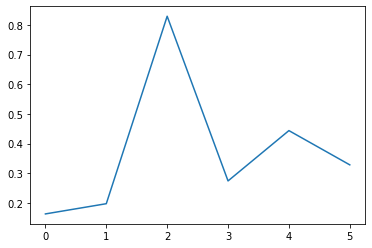

In [595]:
load_series_spectrum_df(df['FFT_RED_SPEK_LP'].head().apply(lambda x: try_load_channels(x) if x else None)).iloc[0,:].plot.line()

<AxesSubplot:>

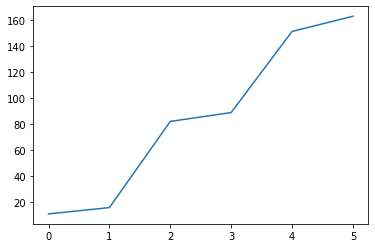

In [596]:
load_series_spectrum_df(df['FFT_RED_FREQ_SPEK_LP'].head().apply(lambda x: try_load_channels(x) if x else None)).iloc[0,:].plot.line()

<AxesSubplot:>

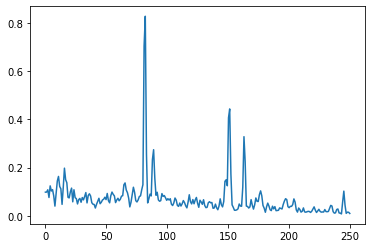

In [597]:
load_series_spectrum_df(df['SPEK_LP'].head().apply(lambda x: try_load_channels(x) if x else None)).iloc[0,:].plot.line()

_RED_ columns are for visualization pusposes, will drop for now

In [617]:
df = df.drop(['FFT_RED_SPEK_L1',
            'FFT_RED_SPEK_L2',
            'FFT_RED_SPEK_L3',
            'FFT_RED_SPEK_LP',
            'FFT_RED_SPEK_R1',
            'FFT_RED_SPEK_R2',
            'FFT_RED_SPEK_R3',
            'FFT_RED_SPEK_RP',
            'FFT_RED_FREQ_SPEK_RP',
            'FFT_RED_FREQ_SPEK_R1',
            'FFT_RED_FREQ_SPEK_R2',
            'FFT_RED_FREQ_SPEK_R3',
            'FFT_RED_FREQ_SPEK_L1',
            'FFT_RED_FREQ_SPEK_L2',
            'FFT_RED_FREQ_SPEK_L3'], axis=1)

In [618]:
df.shape

(113035, 97)

In [726]:
spectral_data = [
    'SPEK_L1',
    'SPEK_L2',
    'SPEK_L3',
    'SPEK_LP',
    'SPEK_R1_1',
    'SPEK_R2_1',
    'SPEK_R3_1',
    'SPEK_RP_1',
    'SPEK_R1_2',
    'SPEK_R2_2',
    'SPEK_R3_2',
    'SPEK_RP_2',
    'SPEK_R1_3',
    'SPEK_R2_3',
    'SPEK_R3_3',
    'SPEK_RP_3',
    'SPEK_R1_4',
    'SPEK_R2_4',
    'SPEK_R3_4',
    'SPEK_RP_4',
    'SPEK_R1_5',
    'SPEK_R2_5',
    'SPEK_R3_5',
    'SPEK_RP_5',
    'SPEK_R1_6',
    'SPEK_R2_6',
    'SPEK_R3_6',
    'SPEK_RP_6']

In [666]:
def nio_labels(nio_series):
    nio_df = pd.DataFrame(nio_series.astype(str).str.rjust(10,'0').apply(lambda x: [i for i in x] if len(x)==10 else None).apply(pd.Series))
    nio_df.columns = ['1,000,000,000', '100,000,000', '10,000,000', '1,000,000', '100,000', '10,000', '1,000', '100', '10', '1']
    return nio_df

In [667]:
df_split_labels = df.join(nio_labels(df['NIO']))

## Export spectral data to csv files

In [725]:
def try_load_channels(x):
    try:
        return dat.load_channels(x)
    except ValueError:
        return None
    
def load_series_spectrum_df(series_dict_channels):
    """
    Takes a series of dictionaries generated by pd.Series.apply(load_channels)
    and returns a dataframe with the frequencies expanded as columns.
    If the frequencies are not identically overlapping across rows, the resulting 
    set of columns will the the union of all the different frequency sets, where 
    rows not containing a given frequency will be NaN
    """
    dict_df = {}
    for i, dict_channels in series_dict_channels.items():
        if dict_channels:
            for key, value_dict in dict_channels.items():
                n_rows = len(value_dict['value_y'])
                x_values = np.array(value_dict['delta_x']).dot(np.arange(n_rows))
                for j, freq in enumerate(x_values):
                    freqs = dict_df.get(freq, {})
                    freqs[i] = value_dict['value_y'][j]
                    dict_df[freq] = freqs
        else:
            pass
    return pd.DataFrame.from_dict(dict_df)

In [728]:
import sys
start_time = time.time()
for col in spectral_data:
    try:
        toc=time.time()
        df_speck = load_series_spectrum_df(df[col].apply(lambda x: try_load_channels(x) if x else None))
        df_speck.to_csv(f'../data/processed/spectral_data/MA_NR-78635_{col}.csv', header=True, index=True, index_label=False)
        tic=time.time()
        print(f'{col}: {tic-toc} sec; shape: {df_speck.shape}; columns containing NAs: {df_speck.columns[df_speck.isna().sum() > 0]}')
    except: 
        print(f'{col} failed: {sys.exc_info()[0:2]}')
end_time = time.time()
print(f'total_time = {end_time - start_time} sec')

SPEK_L1: 1022.1041977405548 sec; shape: (113035, 1230); columns containing NAs: Float64Index([], dtype='float64')
SPEK_L2: 1006.4206852912903 sec; shape: (113035, 1230); columns containing NAs: Float64Index([], dtype='float64')
SPEK_L3: 889.1884806156158 sec; shape: (113035, 1230); columns containing NAs: Float64Index([], dtype='float64')
SPEK_LP: 166.55589032173157 sec; shape: (113035, 513); columns containing NAs: Float64Index([250.9765625,  251.953125, 252.9296875,   253.90625, 254.8828125,
               255.859375, 256.8359375,    257.8125, 258.7890625,  259.765625,
              ...
              491.2109375,    492.1875, 493.1640625,  494.140625, 495.1171875,
                496.09375, 497.0703125,  498.046875, 499.0234375,       500.0],
             dtype='float64', length=256)
SPEK_R1_1: 812.3896791934967 sec; shape: (113032, 1230); columns containing NAs: Float64Index([], dtype='float64')
SPEK_R2_1: 876.0915551185608 sec; shape: (113032, 1230); columns containing NAs: Float64

In [736]:
## rerun SPEK_R3_2
for col in spectral_data[10:11]:
    try:
        toc=time.time()
        df_speck = load_series_spectrum_df(df[col].apply(lambda x: try_load_channels(x) if x else None))
        df_speck.to_csv(f'../data/processed/spectral_data/MA_NR-78635_{col}.csv', header=True, index=True, index_label=False)
        tic=time.time()
        print(f'{col}: {tic-toc} sec; shape: {df_speck.shape}; columns containing NAs: {df_speck.columns[df_speck.isna().sum() > 0]}')
    except: 
        print(f'{col} failed: {sys.exc_info()[0:2]}')


SPEK_R3_2: 926.0304789543152 sec; shape: (113032, 1230); columns containing NAs: Float64Index([], dtype='float64')


In [719]:
test_load = pd.read_csv('../data/processed/spectral_data/MA_NR-78635_SPEK_LP.csv')

In [737]:
def load_series_spectrum_df_2(series_dict_channels):
    """
    Takes a series of dictionaries generated by pd.Series.apply(load_channels)
    and returns a dataframe with the frequencies expanded as columns.
    If the frequencies are not identically overlapping across rows, the resulting 
    set of columns will the the union of all the different frequency sets, where 
    rows not containing a given frequency will be NaN
    """
    dict_df = {}
    for i, dict_channels in series_dict_channels.items():
        if dict_channels:
            for key, value_dict in dict_channels.items():
                n_rows = len(value_dict['value_y'])
                x_values = np.array(value_dict['delta_x']).dot(np.arange(n_rows))
                for j, freq in enumerate(x_values):
                    try: 
                        dict_df[freq][i] = value_dict['value_y'][j]
                    except KeyError:
                        dict_df[freq] = {i: value_dict['value_y'][j]}
        else:
            pass
    return pd.DataFrame.from_dict(dict_df)

In [738]:
## rerun SPEK_R3_2
for col in spectral_data[10:11]:
    try:
        toc=time.time()
        df_speck = load_series_spectrum_df_2(df[col].apply(lambda x: try_load_channels(x) if x else None))
        tic=time.time()
        print(f'{col}: {tic-toc} sec; shape: {df_speck.shape}; columns containing NAs: {df_speck.columns[df_speck.isna().sum() > 0]}')
    except: 
        print(f'{col} failed: {sys.exc_info()[0:2]}')


SPEK_R3_2: 689.3304252624512 sec; shape: (113032, 1230); columns containing NAs: Float64Index([], dtype='float64')


In [740]:
df_speck.head()

,0.000000,1.220703,2.441406,3.662109,4.882812,6.103516,7.324219,8.544922,9.765625,10.986328,...,1489.257812,1490.478516,1491.699219,1492.919922,1494.140625,1495.361328,1496.582031,1497.802734,1499.023438,1500.244141
0,0.003016,0.003218,0.002137,0.001445,0.001919,0.001701,0.001086,0.001079,0.001717,0.001692,...,0.002782,0.002200,0.002816,0.002101,0.002467,0.003473,0.002741,0.003360,0.002223,0.002836
1,0.002304,0.004142,0.002187,0.002218,0.002217,0.002621,0.001819,0.001895,0.001156,0.001503,...,0.002606,0.002309,0.002504,0.003267,0.002524,0.002605,0.002655,0.003054,0.003970,0.002770
2,0.001961,0.003091,0.001870,0.002018,0.001953,0.001500,0.001316,0.001704,0.001638,0.001608,...,0.001853,0.002341,0.002505,0.002694,0.003528,0.002348,0.002829,0.002625,0.003096,0.001711
3,0.003111,0.004689,0.002067,0.002174,0.001511,0.001322,0.001669,0.001973,0.001365,0.001451,...,0.001824,0.001910,0.003137,0.003335,0.002383,0.002308,0.001884,0.002777,0.002672,0.002144
4,0.002935,0.004328,0.001110,0.002171,0.002773,0.001418,0.001678,0.001443,0.002232,0.002341,...,0.002974,0.002385,0.002042,0.002140,0.001807,0.002348,0.002461,0.004219,0.003352,0.002057


In [747]:
df['SPEK_R1_3'].loc[df['SPEK_R1_3'].isna()==False].head()

8727     b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64...
43711    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,10,64...
43712    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,10,64...
43713    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,10,64...
43714    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,10,64...
Name: SPEK_R1_3, dtype: object

In [749]:
dat.load_channels(df['SPEK_R1_3'][8727])

{'SPEK_R1_3': {'delta_x': 1.220703125,
  'trigger_time': '2020-12-07 07:57:51.8799',
  'decode_value_y': '7',
  'BytePerValue_value_y': '4',
  'buffer_size_value_y': 4920,
  'buffer_start_value_y': 0,
  'X0': 0.0,
  'unit_y': '',
  'unit_y_scale-factor': 0.0,
  'unit_y_scale-factor_Offset': 0.0,
  'name': 'SPEK_R1_3',
  'value_y': array([0.00838478, 0.01449084, 0.01060201, ..., 0.00078213, 0.0013749 ,
         0.00187378], dtype=float32)}}

In [751]:
df['SPEK_R1_3'][43714]

b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,10,64,1,0;\r\n|NO,1,7,1,0,,0,;\r\n|NL,1,10,1252,0x407;\r\n|CI,1,39,0,8,9,SPEK_R1_3,\x00\x00\x00\x00\x00\x00\x00\x00,0,,0,,\x00\x00\x80\xd57*\xd3A;\r\n'

In [750]:
dat.load_channels(df['SPEK_R1_3'][43714])

ValueError: Block expected, no famos format

In [752]:
df['SPEK_R1_3'].loc[df['SPEK_R1_3'].isna()==False].tail()

113030    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64...
113031    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64...
113032    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64...
113033    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64...
113034    b'|CF,2,1,1;|CK,1,3,1,1;\r\n|Nv,1,13,7,4,11,64...
Name: SPEK_R1_3, dtype: object

In [753]:
dat.load_channels(df['SPEK_R1_3'][113034])

ValueError: Block expected, no famos format

In [754]:
SPEK_LP = pd.read_csv('../data/processed/spectral_data/MA_NR-78635_SPEK_LP.csv')

In [755]:
SPEK_LP.shape

(113035, 513)

In [756]:
SPEK_LP.head()

,0.0,0.9765625,1.953125,2.9296875,3.90625,4.8828125,5.859375,6.8359375,7.8125,8.7890625,...,491.2109375,492.1875,493.1640625,494.140625,495.1171875,496.09375,497.0703125,498.046875,499.0234375,500.0
0,0.097836,0.098067,0.107619,0.075665,0.123915,0.102651,0.108217,0.082201,0.039824,0.091453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.102464,0.102132,0.066351,0.061782,0.110933,0.120208,0.040804,0.043677,0.092120,0.066657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.112794,0.135552,0.057098,0.067506,0.122950,0.084439,0.091765,0.046031,0.101176,0.196271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.109651,0.132248,0.083148,0.083044,0.115024,0.092542,0.059611,0.089226,0.118592,0.093869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.105222,0.103340,0.040659,0.056178,0.158976,0.151782,0.050422,0.052808,0.059979,0.112698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [757]:
SPEK_LP.isna().sum()

0.0                0
0.9765625          0
1.953125           0
2.9296875          0
3.90625            0
               ...  
496.09375      48473
497.0703125    48473
498.046875     48473
499.0234375    48473
500.0          48473
Length: 513, dtype: int64

In [767]:
SPEK_LP.loc[3,:]

0.0            0.109651
0.9765625      0.132248
1.953125       0.083148
2.9296875      0.083044
3.90625        0.115024
                 ...   
496.09375           NaN
497.0703125         NaN
498.046875          NaN
499.0234375         NaN
500.0               NaN
Name: 3, Length: 513, dtype: float64

In [771]:
ids = df[['PRIMARY', 'MA_NR', 'WSG_ID', 'WZD_ID', 'ST_ID', 'AT_ID']]

,PRIMARY,MA_NR,WSG_ID,WZD_ID,ST_ID,AT_ID
0,4404801,78635,15,10027,20371,10082
1,4404800,78635,15,10027,20371,10082
2,4404824,78635,15,10027,20371,10082
3,4404823,78635,15,10027,20371,10082
4,4404822,78635,15,10027,20371,10082
...,...,...,...,...,...,...
113030,4259473,78635,14,22,20365,80
113031,4259474,78635,14,22,20365,80
113032,4259475,78635,14,22,20365,80
113033,4259484,78635,14,22,20365,80


In [779]:
import os
files = os.listdir('../data/processed/spectral_data')

In [781]:
files = files[1:]

In [782]:
files

['MA_NR-78635_SPEK_L1.csv',
 'MA_NR-78635_SPEK_L2.csv',
 'MA_NR-78635_SPEK_L3.csv',
 'MA_NR-78635_SPEK_LP.csv',
 'MA_NR-78635_SPEK_R1_1.csv',
 'MA_NR-78635_SPEK_R1_2.csv',
 'MA_NR-78635_SPEK_R1_3.csv',
 'MA_NR-78635_SPEK_R1_4.csv',
 'MA_NR-78635_SPEK_R1_5.csv',
 'MA_NR-78635_SPEK_R1_6.csv',
 'MA_NR-78635_SPEK_R2_1.csv',
 'MA_NR-78635_SPEK_R2_2.csv',
 'MA_NR-78635_SPEK_R2_3.csv',
 'MA_NR-78635_SPEK_R2_4.csv',
 'MA_NR-78635_SPEK_R2_5.csv',
 'MA_NR-78635_SPEK_R2_6.csv',
 'MA_NR-78635_SPEK_R3_1.csv',
 'MA_NR-78635_SPEK_R3_2.csv',
 'MA_NR-78635_SPEK_R3_3.csv',
 'MA_NR-78635_SPEK_R3_4.csv',
 'MA_NR-78635_SPEK_R3_5.csv',
 'MA_NR-78635_SPEK_R3_6.csv',
 'MA_NR-78635_SPEK_RP_1.csv',
 'MA_NR-78635_SPEK_RP_2.csv',
 'MA_NR-78635_SPEK_RP_3.csv',
 'MA_NR-78635_SPEK_RP_4.csv',
 'MA_NR-78635_SPEK_RP_5.csv',
 'MA_NR-78635_SPEK_RP_6.csv']

In [784]:
temp_df = pd.read_csv('../data/processed/spectral_data/MA_NR-78635_SPEK_L1.csv')

In [785]:
temp_df.head()

,0.0,1.220703125,2.44140625,3.662109375,4.8828125,6.103515625,7.32421875,8.544921875,9.765625,10.986328125,...,1489.2578125,1490.478515625,1491.69921875,1492.919921875,1494.140625,1495.361328125,1496.58203125,1497.802734375,1499.0234375,1500.244140625
0,0.004278,0.009542,0.008979,0.006578,0.007937,0.008791,0.005969,0.008531,0.008269,0.007780,...,0.001142,0.001267,0.001123,0.000849,0.000597,0.000816,0.000832,0.000612,0.001274,0.001770
1,0.003139,0.010940,0.011171,0.010567,0.012714,0.008783,0.006660,0.007596,0.009492,0.013701,...,0.000845,0.000964,0.001504,0.001450,0.000977,0.000972,0.001042,0.000604,0.001215,0.001404
2,0.011586,0.019136,0.014117,0.006791,0.008938,0.008643,0.007726,0.005628,0.005584,0.008942,...,0.001136,0.001232,0.001165,0.000706,0.001088,0.001025,0.000909,0.000727,0.001263,0.001291
3,0.009273,0.017790,0.013132,0.007374,0.011082,0.008738,0.007378,0.008716,0.006782,0.009098,...,0.001042,0.000837,0.000757,0.000558,0.000884,0.001010,0.001561,0.001007,0.001087,0.001439
4,0.003870,0.014050,0.013681,0.009128,0.007786,0.006690,0.005286,0.008922,0.007155,0.008365,...,0.001080,0.000522,0.000858,0.000742,0.001047,0.000857,0.000864,0.000797,0.001385,0.001713


In [788]:
ids_temp_df = ids.head().join(temp_df.head()).set_index('PRIMARY')

In [789]:
ids_temp_df

,MA_NR,WSG_ID,WZD_ID,ST_ID,AT_ID,0.0,1.220703125,2.44140625,3.662109375,4.8828125,...,1489.2578125,1490.478515625,1491.69921875,1492.919921875,1494.140625,1495.361328125,1496.58203125,1497.802734375,1499.0234375,1500.244140625
PRIMARY,,,,,,,,,,,,,,,,,,,,,
4404801,78635,15,10027,20371,10082,0.004278,0.009542,0.008979,0.006578,0.007937,...,0.001142,0.001267,0.001123,0.000849,0.000597,0.000816,0.000832,0.000612,0.001274,0.001770
4404800,78635,15,10027,20371,10082,0.003139,0.010940,0.011171,0.010567,0.012714,...,0.000845,0.000964,0.001504,0.001450,0.000977,0.000972,0.001042,0.000604,0.001215,0.001404
4404824,78635,15,10027,20371,10082,0.011586,0.019136,0.014117,0.006791,0.008938,...,0.001136,0.001232,0.001165,0.000706,0.001088,0.001025,0.000909,0.000727,0.001263,0.001291
4404823,78635,15,10027,20371,10082,0.009273,0.017790,0.013132,0.007374,0.011082,...,0.001042,0.000837,0.000757,0.000558,0.000884,0.001010,0.001561,0.001007,0.001087,0.001439
4404822,78635,15,10027,20371,10082,0.003870,0.014050,0.013681,0.009128,0.007786,...,0.001080,0.000522,0.000858,0.000742,0.001047,0.000857,0.000864,0.000797,0.001385,0.001713


In [791]:
for file in files:
    temp_df = pd.read_csv(f'../data/processed/spectral_data/{file}')
    shape=temp_df.shape
    temp_df = ids.join(temp_df, how='inner').set_index('PRIMARY')
    temp_df.to_csv(f'../data/processed/spectral_data/{file}', header=True, index=True, index_label=False)
    print(f'{shape} -> {temp_df.shape}')

(113035, 1230) -> (113035, 1235)
(113035, 1230) -> (113035, 1235)
(113035, 1230) -> (113035, 1235)
(113035, 513) -> (113035, 518)
(113032, 1230) -> (113032, 1235)
(113032, 1230) -> (113032, 1235)
(1, 1230) -> (1, 1235)
(1, 1230) -> (1, 1235)


EmptyDataError: No columns to parse from file

In [792]:
file

'MA_NR-78635_SPEK_R1_5.csv'

In [798]:
for file in files[9:]:
    try:
        temp_df = pd.read_csv(f'../data/processed/spectral_data/{file}')
        shape=temp_df.shape
        temp_df = ids.join(temp_df, how='inner').set_index('PRIMARY')
        temp_df.to_csv(f'../data/processed/spectral_data/{file}', header=True, index=True, index_label=False)
        print(f'{shape} -> {temp_df.shape}')
    except:
        pass

(113032, 1230) -> (113032, 1235)
(113032, 1230) -> (113032, 1235)
(1, 1230) -> (1, 1235)
(1, 1230) -> (1, 1235)
(113032, 1230) -> (113032, 1235)
(113032, 1230) -> (113032, 1235)
(1, 1230) -> (1, 1235)
(1, 1230) -> (1, 1235)
(113032, 513) -> (113032, 518)
(113032, 513) -> (113032, 518)
(1, 257) -> (1, 262)
(1, 257) -> (1, 262)


In [799]:
files

['MA_NR-78635_SPEK_L1.csv',
 'MA_NR-78635_SPEK_L2.csv',
 'MA_NR-78635_SPEK_L3.csv',
 'MA_NR-78635_SPEK_LP.csv',
 'MA_NR-78635_SPEK_R1_1.csv',
 'MA_NR-78635_SPEK_R1_2.csv',
 'MA_NR-78635_SPEK_R1_3.csv',
 'MA_NR-78635_SPEK_R1_4.csv',
 'MA_NR-78635_SPEK_R1_5.csv',
 'MA_NR-78635_SPEK_R1_6.csv',
 'MA_NR-78635_SPEK_R2_1.csv',
 'MA_NR-78635_SPEK_R2_2.csv',
 'MA_NR-78635_SPEK_R2_3.csv',
 'MA_NR-78635_SPEK_R2_4.csv',
 'MA_NR-78635_SPEK_R2_5.csv',
 'MA_NR-78635_SPEK_R2_6.csv',
 'MA_NR-78635_SPEK_R3_1.csv',
 'MA_NR-78635_SPEK_R3_2.csv',
 'MA_NR-78635_SPEK_R3_3.csv',
 'MA_NR-78635_SPEK_R3_4.csv',
 'MA_NR-78635_SPEK_R3_5.csv',
 'MA_NR-78635_SPEK_R3_6.csv',
 'MA_NR-78635_SPEK_RP_1.csv',
 'MA_NR-78635_SPEK_RP_2.csv',
 'MA_NR-78635_SPEK_RP_3.csv',
 'MA_NR-78635_SPEK_RP_4.csv',
 'MA_NR-78635_SPEK_RP_5.csv',
 'MA_NR-78635_SPEK_RP_6.csv']